In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
#Get Data

In [4]:
df = pd.read_csv('loan_data.csv')

In [9]:
#Check Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [10]:
#Check head
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


(0.0, 10000.0)

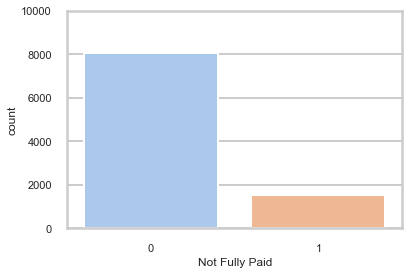

In [13]:
sns.set_style('whitegrid')
sns.set_palette('pastel')
sns.set_context('poster',font_scale=0.50)
A = sns.countplot(x='not.fully.paid',data=df)
plt.xlabel('Not Fully Paid')
A.set_ylim([0,10000])

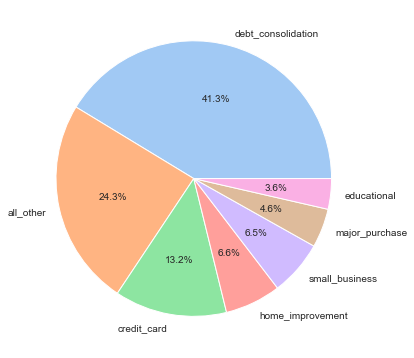

In [10]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.pie(df['purpose'].value_counts(),labels=['debt_consolidation','all_other','credit_card','home_improvement','small_business','major_purchase','educational'],autopct= "%1.1f%%")       
sns.set_context('poster',font_scale=0.30)
plt.tight_layout()
plt.show()

<Figure size 576x720 with 0 Axes>

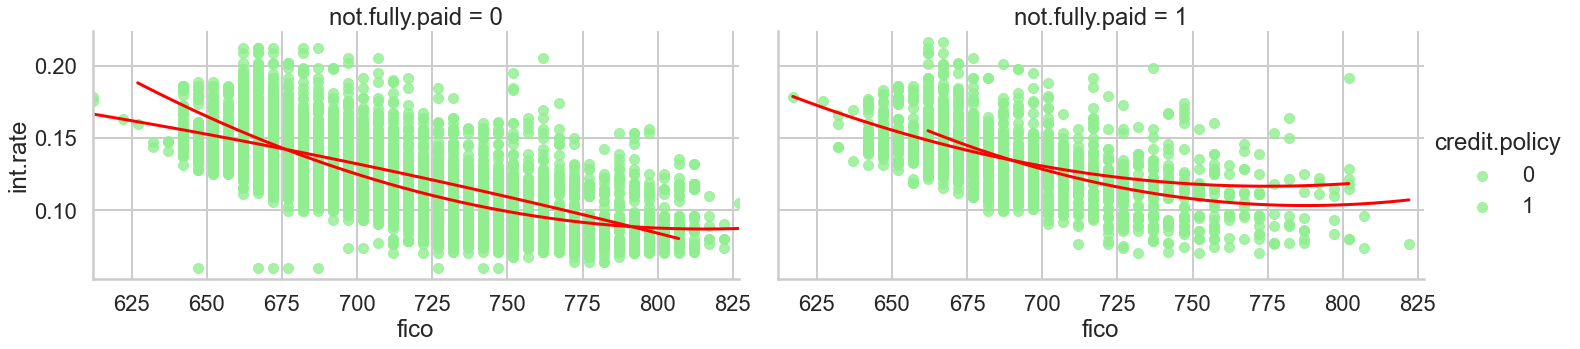

In [4]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,10))
sns.set_context('poster',font_scale=1.0)
sns.lmplot(x='fico', y='int.rate',col='not.fully.paid',hue='credit.policy',data=df,markers="o",
           order=2, ci=None, scatter_kws={"color": "lightgreen",'s':100},
         line_kws={"linewidth":3,"color":"red"},aspect=2)

Text(-2.7823999999999955, 0.5, 'Interest Rate')

<Figure size 720x288 with 0 Axes>

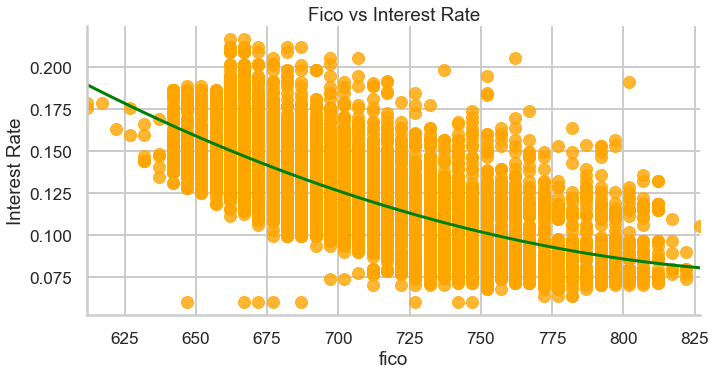

In [9]:
sns.set_palette('colorblind')
plt.figure(figsize=(10,4))
sns.set_context('poster',font_scale=0.78)
sns.lmplot(x='fico', y='int.rate',data=df,markers="o",
           order=2, ci=None, scatter_kws={"color": "orange"},
         line_kws={"linewidth":3,"color":"green"},aspect=2);
plt.title("Fico vs Interest Rate")
plt.ylabel('Interest Rate')

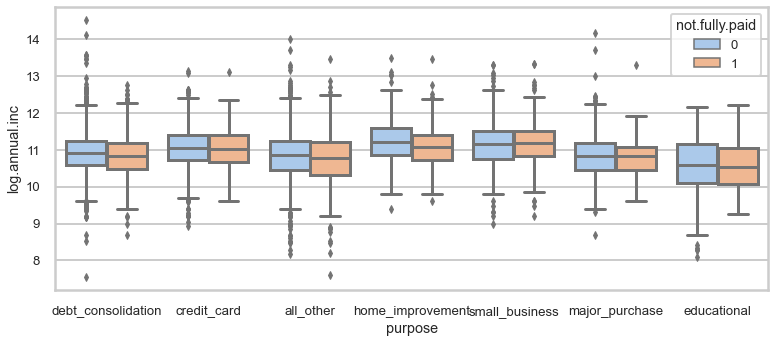

In [12]:
sns.set_context('poster',font_scale=0.60)
sns.set_palette('pastel')
plt.figure(figsize=(11,5))
sns.boxplot(x='purpose',y='log.annual.inc',hue='not.fully.paid',data=df)
plt.tight_layout()

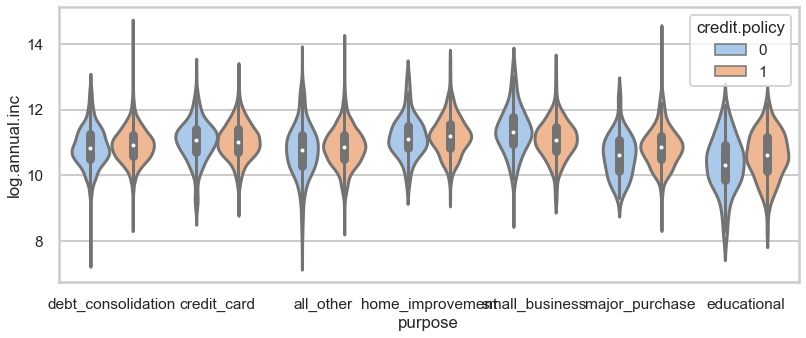

In [15]:
sns.set_context('poster',font_scale=0.70)
sns.set_palette('pastel')
plt.figure(figsize=(11.5,5))
sns.violinplot(x='purpose',y='log.annual.inc',hue='credit.policy',data=df)
plt.tight_layout()

Text(0, 0.5, 'Count')

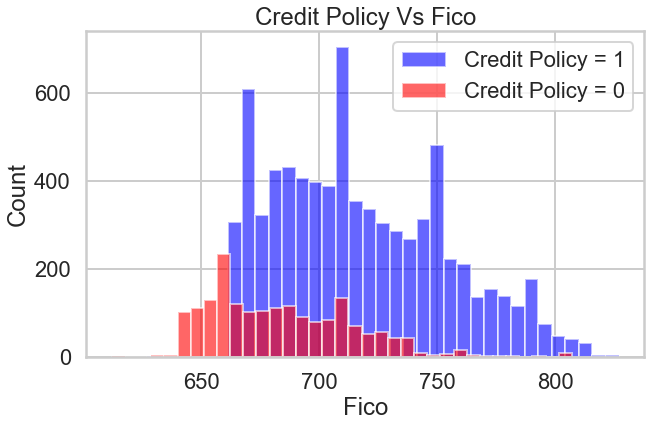

In [9]:
plt.figure(figsize=(10,6))
df[df['credit.policy']==1]['fico'].hist(bins=35,color='blue'
                                            ,label='Credit Policy = 1',
                                           alpha =0.6)
df[df['credit.policy']==0]['fico'].hist(bins=35,color='red',label='Credit Policy = 0',
                                           alpha =0.6)
plt.legend()
plt.title('Credit Policy Vs Fico')
plt.xlabel('Fico')
plt.ylabel('Count')

Text(0, 0.5, 'Not fully paid')

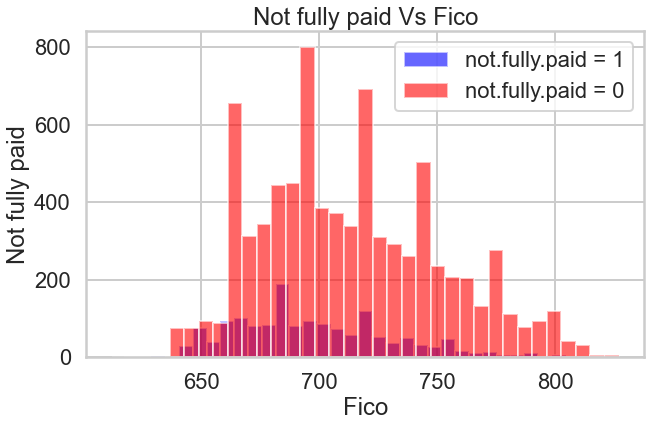

In [10]:
plt.figure(figsize=(10,6))
df[df['not.fully.paid']==1]['fico'].hist(bins=35,color='blue'
                                            ,label='not.fully.paid = 1',
                                           alpha =0.6)
df[df['not.fully.paid']==0]['fico'].hist(bins=35,color='red',label='not.fully.paid = 0',
                                           alpha =0.6)
plt.legend()
plt.title('Not fully paid Vs Fico')
plt.xlabel('Fico')
plt.ylabel('Not fully paid')

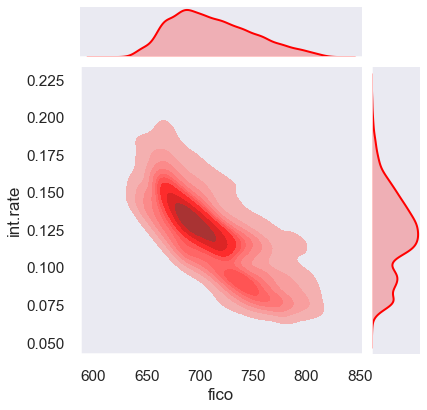

In [41]:
sns.set_style('dark')
sns.set_context('poster',font_scale=0.7)
sns.jointplot(y='int.rate',x='fico',data=df,color='red',kind='kde',fill=True)

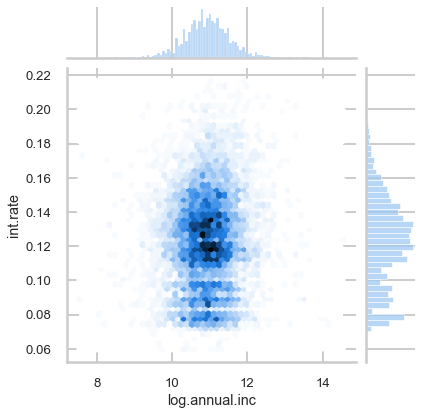

In [74]:
sns.jointplot(x='log.annual.inc',y='int.rate',data=df,kind='hex')

<AxesSubplot:xlabel='log.annual.inc', ylabel='installment'>

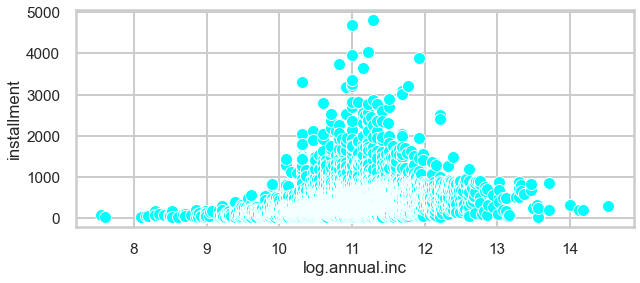

In [14]:
A = df.groupby(['log.annual.inc','int.rate'])['installment'].sum()
A = A.reset_index()
sns.set_context('poster',font_scale=0.7)
A.columns = ['log.annual.inc','int.rate','installment']
plt.figure(figsize=(10,4))
sns.scatterplot(x=A['log.annual.inc'],y=A['installment'],data=A,color='cyan')

In [164]:
#Clean Data

In [21]:
final_data = pd.get_dummies(df,columns=['purpose'],drop_first=True)

In [168]:
#Model Building

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing  import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [41]:
#Random Forest

In [23]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=101)
rfc = RandomForestClassifier(n_estimators=400)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(accuracy_score(y_test,rfc_pred)*100)
k=accuracy_score(y_test,rfc_pred)*100
print('\n')
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

84.72512178148921


[[2424    7]
 [ 432   11]]


              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.61      0.02      0.05       443

    accuracy                           0.85      2874
   macro avg       0.73      0.51      0.48      2874
weighted avg       0.81      0.85      0.78      2874



In [15]:
#KNN Algorithm

Text(0, 0.5, 'Error Rate')

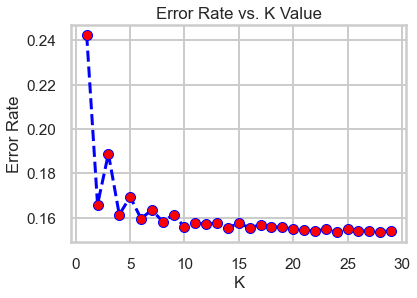

In [42]:
final_data2 = final_data.drop(['not.fully.paid'],axis=1)
scale= StandardScaler()
scale.fit(final_data.drop('not.fully.paid',axis=1))
scaled_features = scale.transform(final_data.drop('not.fully.paid',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=final_data2.columns)
X = df_feat
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=101)
#Choosing A K Value
error = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

sns.set_style('whitegrid')
plt.plot(range(1,30),error,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [24]:
knn = KNeighborsClassifier(n_neighbors=24)
pred = knn.fit(X_train,y_train)
pred = knn.predict(X_test)
#print('LogisticRegression score is: ',np.round(model.score(y_test,pred)*100,decimals=2))
print('\n')
print('Best KNN Accuracy score is: ',accuracy_score(y_test,pred)*100)
print('\n')
m=accuracy_score(y_test,pred)*100

print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))



Best KNN Accuracy score is:  84.58594293667363


[[2431    0]
 [ 443    0]]


              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.00      0.00      0.00       443

    accuracy                           0.85      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.72      0.85      0.78      2874



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
#Logistics Regression

In [43]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=101)
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print('\n')
print('Logistics Accuracy score is: ',accuracy_score(y_test,predictions)*100)
p=accuracy_score(y_test,predictions)*100

print('\n')
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))



Logistics Accuracy score is:  84.72512178148921


[[2425    6]
 [ 433   10]]


              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.62      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.74      0.51      0.48      2874
weighted avg       0.81      0.85      0.78      2874



C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


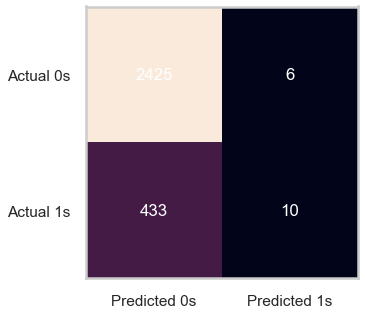

In [51]:
cm = confusion_matrix(y_test, predictions)
fig, ax = plt.subplots(figsize=(6, 5))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [52]:
#Comparison

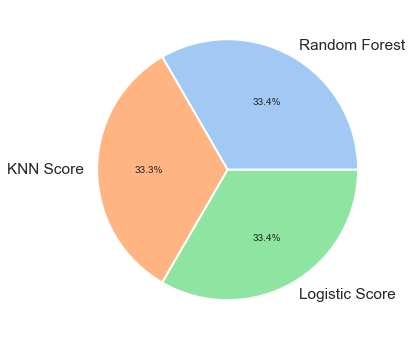

In [51]:
f = []
f.append(k)
f.append(m)
f.append(p)
plt.figure(figsize=(12,6))
label = 'Random Forest','KNN Score','Logistic Score'
plt.pie(f,labels=label,autopct= "%1.1f%%")
plt.show()